In [1]:
from matplotlib.pyplot import *
from mpl_toolkits import mplot3d
from numpy import *
from random import *

In [70]:
#Smooth Step function
def S(x):
    return 3*x*x-2*x*x*x
#Pseudo-random numbers
def a(i,j):
    u,v=50*(i/pi-floor(i/pi)),50*(j/pi-floor(j/pi))
    return 2*(u*v*(u+v)-floor(u*v*(u+v)))-1
#Conditions de raccordement
def b(i,j): return a(i+1,j)
def c(i,j): return a(i,j+1)
def d(i,j): return a(i+1,j+1)

#Noise local
def N(x,y):
    i,j=floor(x),floor(y)
    return a(i,j)+(b(i,j)-a(i,j))*S(x-i)+(c(i,j)-a(i,j))*S(y-j)+(a(i,j)-b(i,j)-c(i,j)+d(i,j))*S(x-i)*S(y-j)
#Génératrice du terrain
def f(x,y):
    result=0
    p=1
    for i in range(10):
        result+=N(p*x,p*y)/p
        p*=2
        temp=x
        x=3/5*x-4/5*y
        y=4/5*temp+3/5*y
    return result

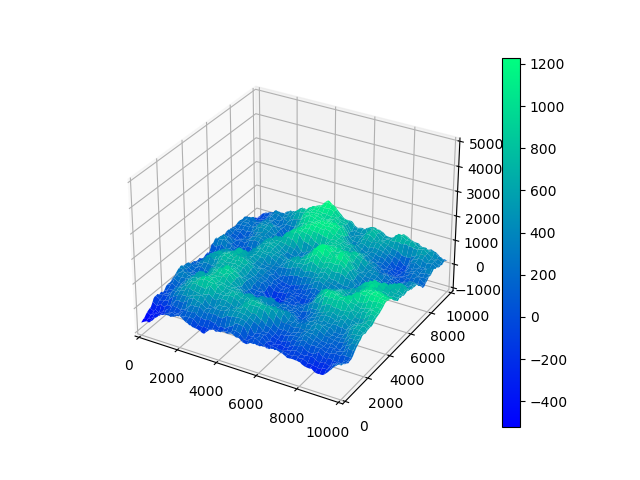

In [77]:
n=128
Map=zeros((n,n))

#Calcul du Laplacien par moyen du voisinage de Von Neumann 
def Laplacien(x,y):
    S=0
    if x>0: S+=Map[x-1][y]
    if x<n-1: S+=Map[x+1][y]
    if y>0: S+=Map[x][y-1]
    if y<n-1: S+=Map[x][y+1]
    return S/4
    
    
#for i in range(100):
#    Map[randint(0,n-1)][randint(0,n-1)]+=100*random()
#for x in range(n):
#        for y in range(n):
#            Map[x][y]=600*f(x/2000,y/2000)+600
            
            
            
#une fonction qui va diffuser des grains du terrain pour aplatir certaines régions     
def diffuse():
    for i in range(10):
        D=10
        t=1
        dt=t/n
        for x in range(n):
            for y in range(n):
                Map[x][y]+=dt*D*Laplacien(x,y)

#La fonction qui affiche en 3D le terrain                
def display3d():
    navigate=1000
    
    x=linspace(0,10*navigate,n)
    y=linspace(0,10*navigate,n)
    X, Y = meshgrid(x, y)
    z=600*f(X/2000,Y/2000)+600
    fig = figure()
    ax = axes(projection ='3d')
    ax.set_xlim3d(0,10*navigate)
    ax.set_ylim3d(0,10*navigate)
    ax.set_zlim3d(-navigate,5*navigate)
    p=ax.plot_surface(X, Y, z, cmap ='winter')
    fig.colorbar(p)
    show()

#Pour afficher le terrain en 2D    
def display2d():
    imshow(Map)
    colorbar()
    show()
    
display3d()
close()